# Cluster sur Hashtags

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
# Chargement des données
data = pd.read_csv("analyse_texte/cancer_sport_analyse.csv")
data2 = pd.read_csv("analyse_Audric2/cancer_cannabis.csv")
data1 = pd.read_csv("analyse_texte/cancer_fasting_analyse.csv")


In [3]:
data.shape

(591, 17)

In [4]:
data1.shape

(1035, 17)

In [5]:

sampled_df = data2.sample(frac=0.015)


In [6]:
sampled_df

,Fichier,ID,Langue,Nb retweet,Nb like,Nb réponses,Nb citations,Hashtags,Texte,Mots,Phrases,Tags POS,Sentiment,Polarité,Subjectivité,Phrases nominales,Texte corrigé,Texte tokénizé
42505,868140732082774017.json,"8,68140732082774E+017",en,0,0,0.0,0.0,"['#CANNABIS', '#CALIFORNIA', '#MEDICAL', '#THC...",Lompoc residents support cannabis access https...,"['Lompoc', 'residents', 'support', 'cannabis',...","[Sentence(""Lompoc residents support cannabis a...","[('Lompoc', 'JJ'), ('residents', 'NNS'), ('sup...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.00,"['lompoc', 'residents support cannabis access ...",Lompoc residents support connais access http:/...,"['Lompoc', 'residents', 'support', 'cannabis',..."
36129,638039845969903618.json,"6,38039845969904E+017",en,0,1,0.0,0.0,"['#WOMAN', '#LUNGCANCER', '#CANNABISOIL', '#CA...",Meet The #Woman Who Beat Her #LungCancer With ...,"['Meet', 'The', 'Woman', 'Who', 'Beat', 'Her',...","[Sentence(""Meet The #Woman Who Beat Her #LungC...","[('Meet', 'NNP'), ('The', 'DT'), ('Woman', 'NN...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.00,"['woman who', 'lungcancer', 'cannabisoil', '@ ...",Feet The #Woman Who Seat Her #LungCancer With ...,"['Meet', 'The', '#', 'Woman', 'Who', 'Beat', '..."
16117,27772268752.json,27772268752,en,0,0,0.0,0.0,"['#AZ', '#PROP203', '#CANCER', '#CANNABIS', '#...",Official TV spot airing in #AZ in favor of #Pr...,"['Official', 'TV', 'spot', 'airing', 'in', 'AZ...","[Sentence(""Official TV spot airing in #AZ in f...","[('Official', 'JJ'), ('TV', 'NN'), ('spot', 'N...","Sentiment(polarity=0.6, subjectivity=0.95)",0.600000,0.95,"['official tv spot', 'az', 'prop203', 'lily ro...",Official of spot firing in #of in favor of #Pr...,"['Official', 'TV', 'spot', 'airing', 'in', '#'..."
35700,808583950700580864.json,"8,08583950700581E+017",en,0,5,0.0,0.0,"['#CANNABIS', '#CANCER']","The ""Science"" (Yes science is real) behind #Ca...","['The', 'Science', 'Yes', 'science', 'is', 're...","[Sentence(""The ""Science"" (Yes science is real)...","[('The', 'DT'), ('Science', 'NN'), ('Yes', 'UH...","Sentiment(polarity=-0.6000000000000001, subjec...",-0.600000,1.00,"['cannabis', '# cancer https']","The ""Science"" (Yes science is real) behind #Ca...","['The', '``', 'Science', ""''"", '(', 'Yes', 'sc..."
30076,651140259107880960.json,"6,51140259107881E+017",en,0,0,0.0,0.0,"['#CANCER', '#CANNABIS', '#MARIJUANA', '#CANNA...",#Cancer patient given 18 months to live is 'cu...,"['Cancer', 'patient', 'given', '18', 'months',...","[Sentence(""#Cancer patient given 18 months to ...","[('Cancer', 'NNP'), ('patient', 'NN'), ('given...","Sentiment(polarity=0.13636363636363635, subjec...",0.136364,0.50,"['# cancer patient', ""cannabis'"", '//t.co/xyff...",#Cancer patient given 18 months to live is 'cu...,"['#', 'Cancer', 'patient', 'given', '18', 'mon..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28942,198974062532370432.json,"1,9897406253237E+017",en,0,0,0.0,0.0,"['#CANCER', '#CANNABIS', '#MMOT']",Cannabinoids As Anti Tumour Agents - OMMP PAY ...,"['Cannabinoids', 'As', 'Anti', 'Tumour', 'Agen...","[Sentence(""Cannabinoids As Anti Tumour Agents ...","[('Cannabinoids', 'NNS'), ('As', 'IN'), ('Anti...","Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.00,"['cannabinoids', 'anti tumour agents', 'ommp p...",Cannabinoids Is Anti Tumour Agents - OMMP PAY ...,"['Cannabinoids', 'As', 'Anti', 'Tumour', 'Agen..."
43061,623929578185203712.json,"6,23929578185204E+017",en,0,0,0.0,0.0,"['#MARIJUANA', '#LUNG', '#CANCER', '#THC', '#C...",Worth repeating: #Marijuana decreases risk of ...,"['Worth', 'repeating', 'Marijuana', 'decreases...","[Sentence(""Worth repeating: #Marijuana decreas...","[('Worth', 'JJ'), ('repeating', 'NN'), ('Marij...","Sentiment(polarity=0.3, subjectivity=0.1)",0.300000,0.10,"['worth', 'marijuana', 'decreases risk', '# lu...",North repeating: #Marijuana decreases risk of ...,"['Worth', 'repeating', ':', '#', 'Marijuana', ..."
10532,5289035

In [7]:
data3 = pd.concat([data,data1,sampled_df])


In [9]:
# Transformer les hashtags en chaînes de caractères
data3['Hashtags'] = data3['Hashtags'].astype(str)


In [10]:
# Vectorisation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data3['Hashtags'])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

def calculate_wss_scores(X, k_max):
    """Calcule les scores WSS pour une plage de valeurs de k."""
    wss_scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wss_scores.append(kmeans.inertia_)
    return wss_scores


wss_score = calculate_wss_scores(X,15)


/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aaudric/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: x and y must have same first dimension, but have shapes (14,) and (1,)

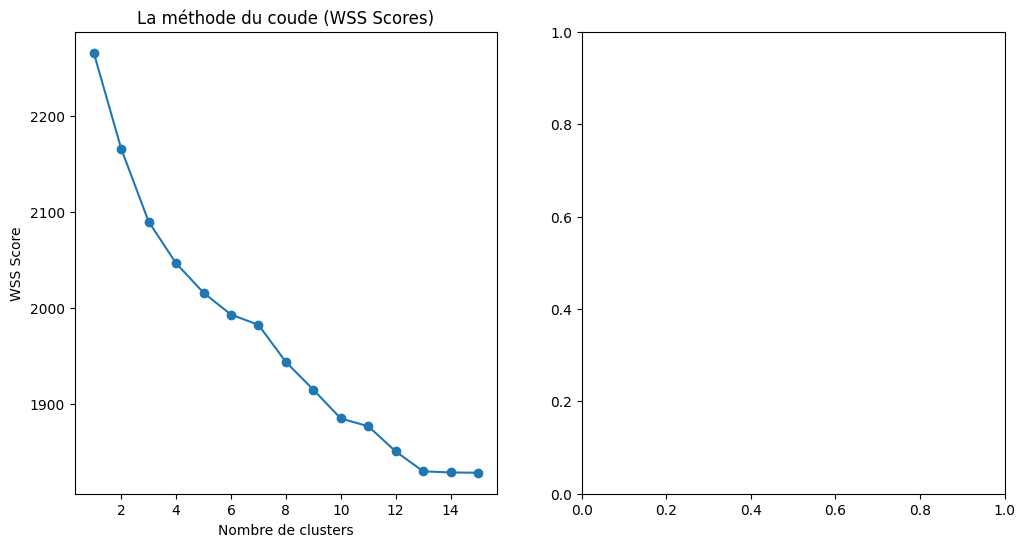

In [12]:
def plot_scores(k_max, wss_scores, silhouette_scores):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, k_max+1), wss_scores, marker='o')
    plt.title('La méthode du coude (WSS Scores)')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('WSS Score')

# Tracer les scores de silhouette
    plt.subplot(1, 2, 2)
    plt.plot(range(2, k_max+1), silhouette_scores, marker='o', color='red')
    plt.title('Scores de silhouette')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Score de silhouette')

    plt.tight_layout()
    plt.show()


plot_scores(15,wss_score,silhouette_score)

In [13]:
# Clustering
num_clusters = 15  # Ajustez ce nombre selon vos besoins
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

In [14]:
# Résultats du clustering
clusters = kmeans.labels_
data3['Cluster'] = clusters

In [2]:
import pandas as pd

In [3]:
data3 = pd.read_csv("cleaned_merged_data.csv")
data3['Hashtags'] = data3['Hashtags'].astype(str)
data3

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_19591/1942445600.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("cleaned_merged_data.csv")


,ID,Nb retweet,Nb like,Nb réponses,Nb citations,Hashtags,Texte,Mots,Phrases,Tags POS,...,joy,love,optimism,pessimism,sadness,surprise,trust,Emotion,Sentiment,Topic_Label
0,721916579533950976,0,0,0.0,0.0,"['#CANCER', '#SPORT', '#PARENTING', '#SCHOOL',...",Is artificial turf giving athletes #cancer ? -...,"['Is', 'artificial', 'turf', 'giving', 'athlet...","[Sentence(""Is artificial turf giving athletes ...","[('Is', 'VBZ'), ('artificial', 'JJ'), ('turf',...",...,0.103101,0.005253,0.098536,0.125076,0.384626,0.025977,0.010681,sadness,"Sentiment(polarity=-0.6, subjectivity=1.0)",Effets des cannabinoïdes sur le cancer
1,238304774825603072,0,1,0.0,0.0,"['#CANCER', '#SPORT']",Frankel's victory at York made me feel '20 yea...,"['Frankel', ""'s"", 'victory', 'at', 'York', 'ma...","[Sentence(""Frankel's victory at York made me f...","[('Frankel', 'NNP'), (""'s"", 'POS'), ('victory'...",...,0.660878,0.110758,0.790566,0.126874,0.795624,0.010345,0.063026,sadness,"Sentiment(polarity=0.5, subjectivity=0.5)",Effets des cannabinoïdes sur le cancer
2,1007390700726575104,0,4,1.0,0.0,"['#SPORT', '#CANCER']",READ THIS! What an absolutely brilliant piece ...,"['READ', 'THIS', 'What', 'an', 'absolutely', '...","[Sentence(""READ THIS!""), Sentence(""What an abs...","[('READ', 'VB'), ('THIS', 'NN'), ('What', 'WP'...",...,0.977163,0.463124,0.966795,0.015647,0.041475,0.019985,0.197131,joy,"Sentiment(polarity=0.5, subjectivity=0.5375)",Utilisation médicale du cannabis dans le trait...
3,668965073889697795,0,0,0.0,0.0,"['#CANCER', '#STROKE', '#SPORT']","MJA InSight News: #Cancer survivors, exercise ...","['MJA', 'InSight', 'News', 'Cancer', 'survivor...","[Sentence(""MJA InSight News: #Cancer survivors...","[('MJA', 'NNP'), ('InSight', 'NNP'), ('News', ...",...,0.043793,0.004469,0.057848,0.218946,0.461584,0.042292,0.013471,sadness,"Sentiment(polarity=0.0, subjectivity=0.0)",Études cliniques et croissance tumorale
4,1098650711049555968,2,1,0.0,0.0,"['#HEALTH', '#CANCER', '#SPORT']",When #health #cancer &amp; #sport are inextric...,"['When', 'health', 'cancer', 'amp', 'sport', '...","[Sentence(""When #health #cancer &amp; #sport a...","[('When', 'WRB'), ('health', 'NN'), ('cancer',...",...,0.957481,0.210567,0.918596,0.018202,0.110482,0.015839,0.082297,joy,"Sentiment(polarity=0.6000000000000001, subject...",Santé et bien-être liés au cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52986,814243207991136256,0,0,0.0,0.0,"['#PREVENTION', '#CANCER', '#CANNABIS']",Is there such a thing as minor surgery? #preve...,"['Is', 'there', 'such', 'a', 'thing', 'as', 'm...","[Sentence(""Is there such a thing as minor surg...","[('Is', 'VBZ'), ('there', 'EX'), ('such', 'JJ'...",...,0.335538,0.016554,0.937874,0.040836,0.036835,0.018766,0.216915,optimism,"Sentiment(polarity=-0.025, subjectivity=0.35)",Effets des cannabinoïdes sur le cancer
52987,703637517581606912,0,1,0.0,0.0,"['#CANNABIS', '#CANCER', '#MARIJUANA']",#Cannabis and #Cancer: why you should take you...,"['Cannabis', 'and', 'Cancer', 'why', 'you', 's...","[Sentence(""#Cannabis and #Cancer: why you shou...","[('Cannabis', 'NNP'), ('and', 'CC'), ('Cancer'...",...,0.094466,0.006602,0.359130,0.099987,0.173215,0.013977,0.026902,optimism,"Sentiment(polarity=0.0, subjectivity=0.0)",Traitement et recherche sur le cancer
52988,650112986573598720,0,0,0.0,0.0,"['#CANCER', '#MARIJUANA', '#CANNABIS', '#MME',...","""Medical Marijuana Helped Save This Child From...","['Medical', 'Marijuana', 'Helped', 'Save', 'Th...","[Sentence(""""Medical Marijuana Helped Save This...","[('Medical', 'JJ'), ('Marijuana', 'NNP'), ('He...",...,0.293725,0.017748,0.556088,0.077633,0.230155,0.014324,0.033417,optimism,"Sentiment(polarity=0.0, subjectivity=0.0)",Utilisation médicale du cannabis dans le trait...
52989,569076506254827521,0,0,0.0,0.0,"['#CANCER', '#MARIJUANA', '#CANNABIS', '#HEMP'...",Charles Rowland\nhttp://t.co/39wgZMQ6ed\n\n#ca...,"['Charles', 'Rowland', 'http', 't.co/39wgZMQ6e...","[Senten

In [6]:
data3 = data3[['Cluster','Emotion','Topic_Label','Hashtags']]

In [7]:
# Compter la fréquence des hashtags dans chaque cluster
hashtag_frequencies = {}
for _, row in data3.iterrows():
    cluster = row['Cluster']
    hashtags = row['Hashtags'].split()  # Assurez-vous que les hashtags sont séparés par des espaces
    for hashtag in hashtags:
        if cluster not in hashtag_frequencies:
            hashtag_frequencies[cluster] = {}
        hashtag_frequencies[cluster][hashtag] = hashtag_frequencies[cluster].get(hashtag, 0) + 1

In [8]:
# Identifier les 3 hashtags les plus fréquents pour chaque cluster
top_hashtags = {}
for cluster, hashtags in hashtag_frequencies.items():
    # Trier les hashtags par fréquence en ordre décroissant et prendre les trois premiers
    top_3_hashtags = sorted(hashtags, key=hashtags.get, reverse=True)[:3]
    top_hashtags[cluster] = top_3_hashtags

In [11]:
# Fonction pour nettoyer les hashtags
def clean_hashtag(hashtag):
    return hashtag.replace("'", "").replace(",", "").replace("[", "").replace("]", "")

# Appliquer la fonction de nettoyage et transformer la liste en chaîne de caractères
for cluster in top_hashtags:
    top_hashtags[cluster] = ", ".join(map(clean_hashtag, top_hashtags[cluster]))

In [12]:
# Remplacer le numéro du cluster par les 3 hashtags les plus fréquents dans le DataFrame
data3['Top_3_Hashtags'] = data3['Cluster'].apply(lambda x: top_hashtags[x])

# Afficher le DataFrame mis à jour
print(data3[['Hashtags', 'Top_3_Hashtags']])


                                                Hashtags  \
0      ['#CANCER', '#SPORT', '#PARENTING', '#SCHOOL',...   
1                                  ['#CANCER', '#SPORT']   
2                                  ['#SPORT', '#CANCER']   
3                       ['#CANCER', '#STROKE', '#SPORT']   
4                       ['#HEALTH', '#CANCER', '#SPORT']   
...                                                  ...   
52986            ['#PREVENTION', '#CANCER', '#CANNABIS']   
52987             ['#CANNABIS', '#CANCER', '#MARIJUANA']   
52988  ['#CANCER', '#MARIJUANA', '#CANNABIS', '#MME',...   
52989  ['#CANCER', '#MARIJUANA', '#CANNABIS', '#HEMP'...   
52990  ['#MME', '#CANCER', '#CANNABIS', '#CBD', '#MAR...   

                       Top_3_Hashtags  
0       #CANCER, #CANNABIS, #CANNABIS  
1       #CANCER, #CANNABIS, #CANNABIS  
2       #CANCER, #CANNABIS, #CANNABIS  
3       #CANCER, #CANNABIS, #CANNABIS  
4       #CANCER, #CANNABIS, #CANNABIS  
...                               ...  

In [13]:
data3

,Cluster,Emotion,Topic_Label,Hashtags,Top_3_Hashtags
0,5,sadness,Effets des cannabinoïdes sur le cancer,"['#CANCER', '#SPORT', '#PARENTING', '#SCHOOL',...","#CANCER, #CANNABIS, #CANNABIS"
1,5,sadness,Effets des cannabinoïdes sur le cancer,"['#CANCER', '#SPORT']","#CANCER, #CANNABIS, #CANNABIS"
2,5,joy,Utilisation médicale du cannabis dans le trait...,"['#SPORT', '#CANCER']","#CANCER, #CANNABIS, #CANNABIS"
3,5,sadness,Études cliniques et croissance tumorale,"['#CANCER', '#STROKE', '#SPORT']","#CANCER, #CANNABIS, #CANNABIS"
4,5,joy,Santé et bien-être liés au cancer,"['#HEALTH', '#CANCER', '#SPORT']","#CANCER, #CANNABIS, #CANNABIS"
...,...,...,...,...,...
52986,5,optimism,Effets des cannabinoïdes sur le cancer,"['#PREVENTION', '#CANCER', '#CANNABIS']","#CANCER, #CANNABIS, #CANNABIS"
52987,4,optimism,Traitement et recherche sur le cancer,"['#CANNABIS', '#CANCER', '#MARIJUANA']","#CANNABIS, #MARIJUANA, #CANCER"
52988,1,optimism,Utilisation médicale du cannabis dans le trait...,"['#CANCER', '#MARIJUANA', '#CANNABIS', '#MME',...","#CANNABIS, #MARIJUANA, #CANCER"
52989,12,joy,Potentiel thérapeutique du cannabis dans la lu...,"['#CANCER', '#MARIJUANA', '#CANNABIS', '#HEMP'...","#CANNABIS, #HEMP, #CANCER"


In [14]:
data3[["Cluster","Top_3_Hashtags"]].value_counts()

Cluster  Top_3_Hashtags                                 
5        #CANCER, #CANNABIS, #CANNABIS                      18814
3        #CANNABIS, #CANCER, #CANCER                         5966
1        #CANNABIS, #MARIJUANA, #CANCER                      3929
8        #CANCER, #CANNABIS, #PTSD                           2989
9        #CANCER, #CANNABIS, #MMJ                            2819
4        #CANNABIS, #MARIJUANA, #CANCER                      2411
10       #CANNABIS, #MEDICALMARIJUANA, #MEDICALMARIJUANA     2248
13       #THC, #CBD, #CANNABIS                               2183
12       #CANNABIS, #HEMP, #CANCER                           2165
11       #CANCER, #MME, #CANNABIS                            2087
6        #CANCER, #MARIJUANA, #MEDICAL                       1930
14       #CANCER, #CANNABIS, #HEALTH                         1919
2        #CANCER, #POT, #CANNABIS                            1752
0        #EPILEPSY, #CANNABIS, #MARIJUANA                    1378
7        #CANCER, #

In [21]:
data3.to_csv("cluster.csv")

## Graphe co-occurence

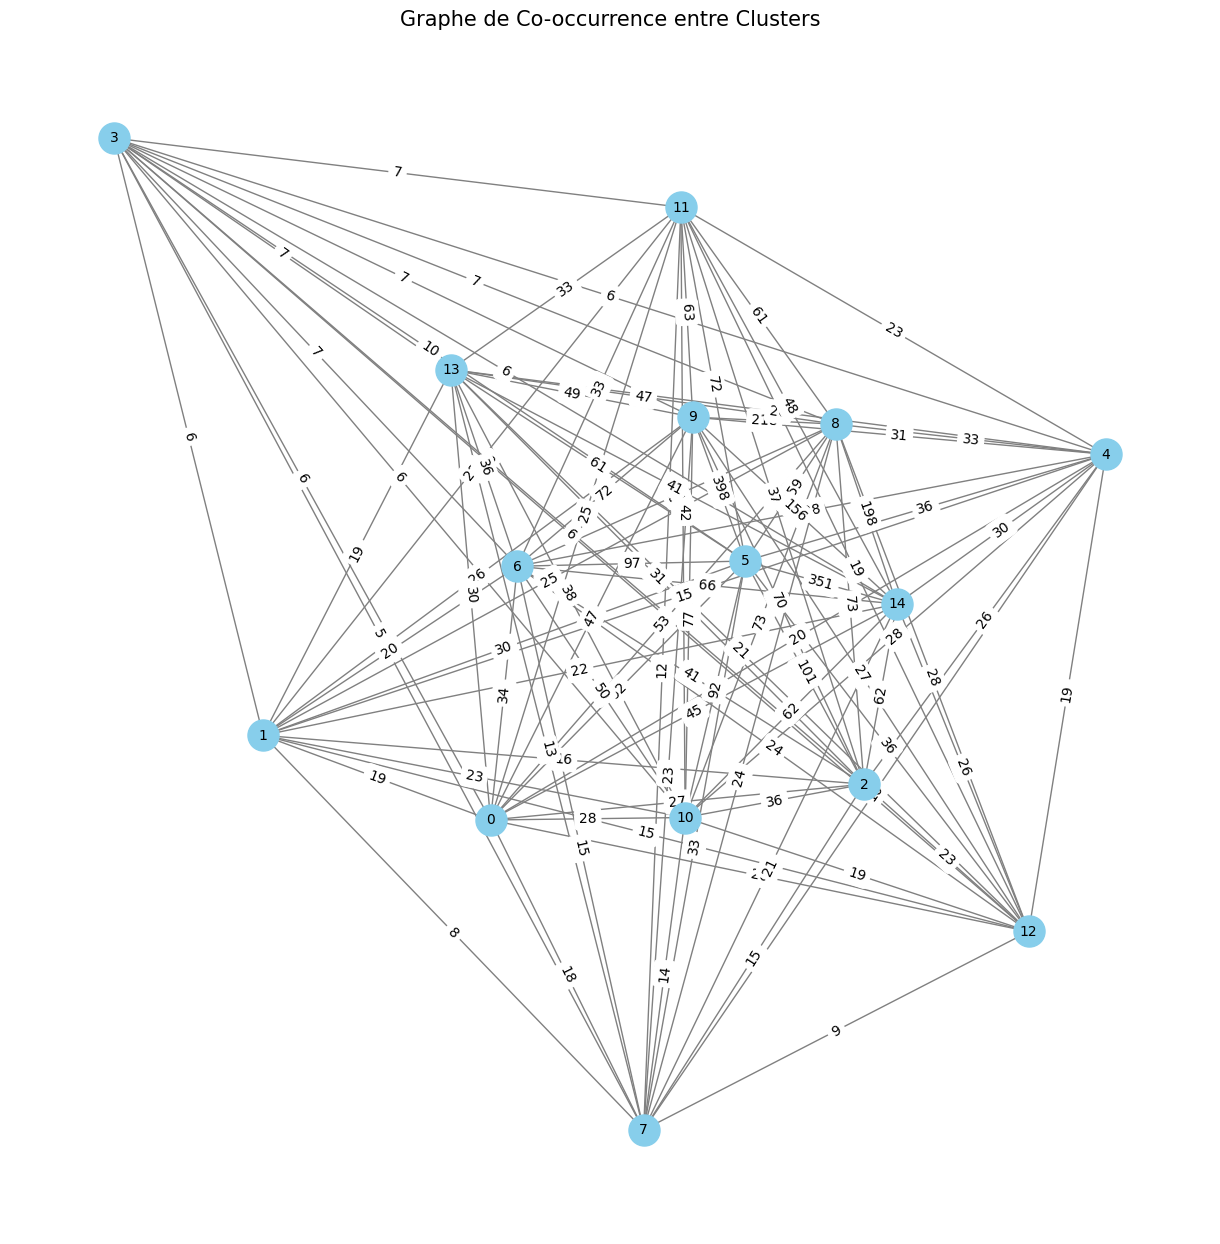

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Création d'un graphe vide
C = nx.Graph()

# Créer une liste de hashtags par cluster
hashtags_by_cluster = {}
for _, row in data3.iterrows():
    cluster = row['Cluster']
    hashtags = row['Hashtags'].split()  # Assurez-vous de séparer les hashtags par des espaces
    if cluster not in hashtags_by_cluster:
        hashtags_by_cluster[cluster] = set()
    hashtags_by_cluster[cluster].update(hashtags)

# Identifier les co-occurrences entre clusters
co_occurrence_clusters = {}
for cluster1, hashtags1 in hashtags_by_cluster.items():
    for cluster2, hashtags2 in hashtags_by_cluster.items():
        if cluster1 != cluster2:
            common_hashtags = hashtags1.intersection(hashtags2)
            if common_hashtags:
                co_occurrence_clusters[(cluster1, cluster2)] = len(common_hashtags)

# Ajout des nœuds et des arêtes au graphe
for (cluster1, cluster2), weight in co_occurrence_clusters.items():
    C.add_edge(cluster1, cluster2, weight=weight)

# Visualisation du graphe
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(C)  # Positionnement des nœuds
nx.draw(C, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray')
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)
plt.title("Graphe de Co-occurrence entre Clusters", size=15)
plt.show()


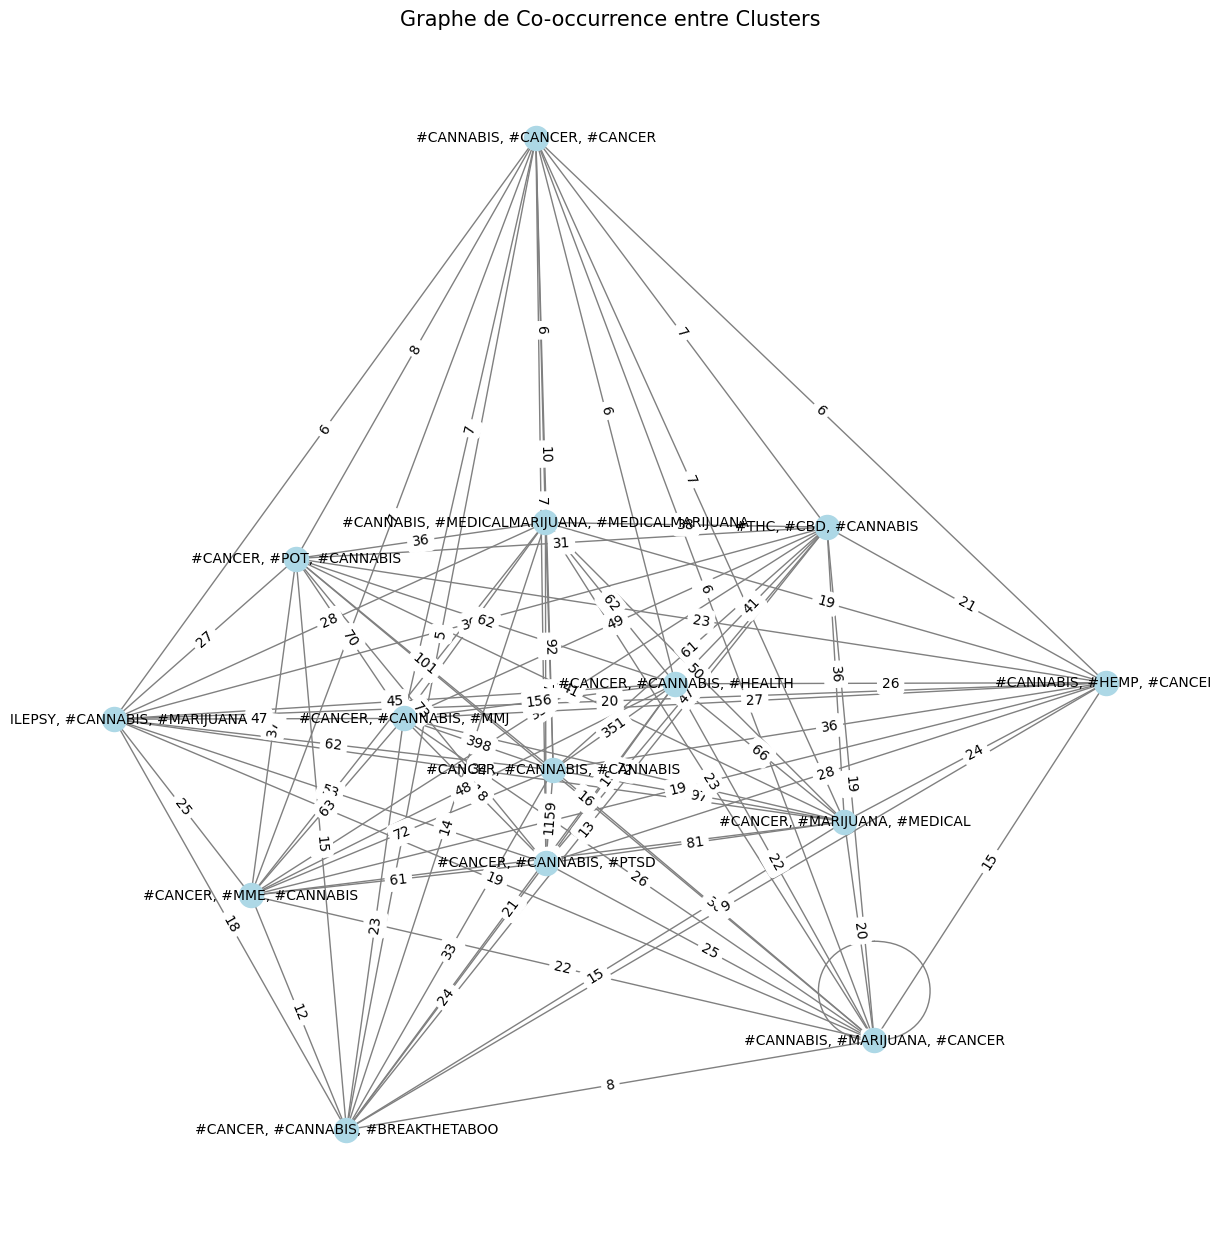

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Création d'un graphe vide
C = nx.Graph()

# Créer une liste de hashtags par cluster
hashtags_by_cluster = {}
for _, row in data3.iterrows():
    cluster = row['Cluster']
    hashtags = row['Hashtags'].split()  # Assurez-vous de séparer les hashtags par des espaces
    if cluster not in hashtags_by_cluster:
        hashtags_by_cluster[cluster] = set()
    hashtags_by_cluster[cluster].update(hashtags)

# Identifier les co-occurrences entre clusters
co_occurrence_clusters = {}
for cluster1, hashtags1 in hashtags_by_cluster.items():
    for cluster2, hashtags2 in hashtags_by_cluster.items():
        if cluster1 != cluster2:
            common_hashtags = hashtags1.intersection(hashtags2)
            if common_hashtags:
                co_occurrence_clusters[(cluster1, cluster2)] = len(common_hashtags)


# Ajout des nœuds et des arêtes au graphe
for (cluster1, cluster2), weight in co_occurrence_clusters.items():
    hashtag1 = top_hashtags[cluster1]
    hashtag2 = top_hashtags[cluster2]
    C.add_edge(hashtag1, hashtag2, weight=weight)

# Visualisation du graphe
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(C, k=1.5)  # k régule la distance entre les nœuds
nx.draw(C, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)
plt.title("Graphe de Co-occurrence entre Clusters", size=15)
plt.show()


## Graphe détection communauté

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_19591/4031086889.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)


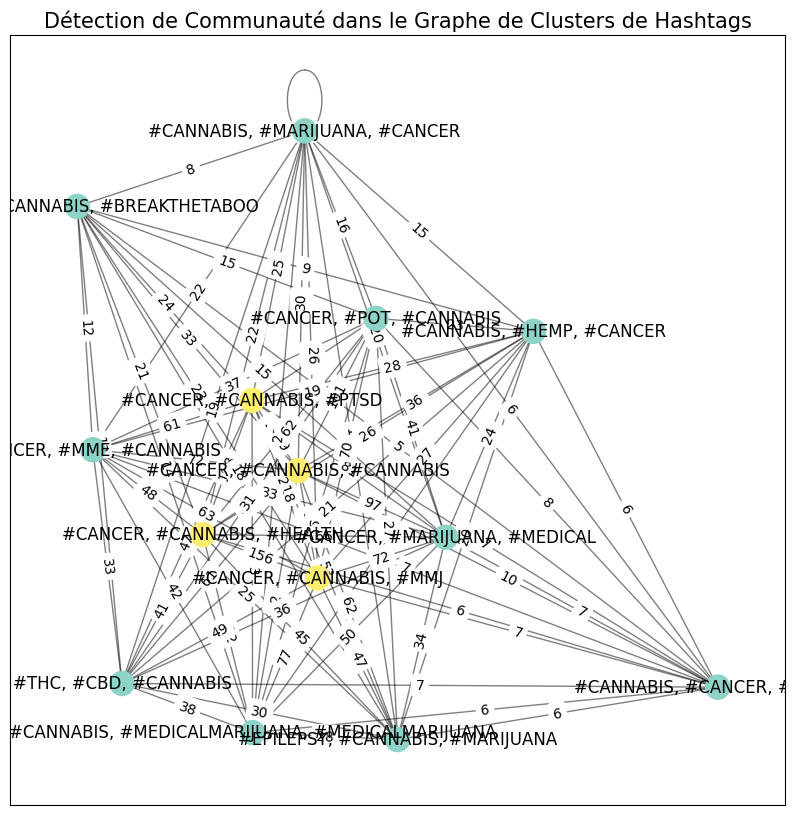

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import networkx as nx
import pandas as pd

# Détection de communauté avec l'algorithme de Louvain
partition = community_louvain.best_partition(C)

# Visualisation
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(C, k=1.5)

# Coloration des nœuds en fonction de leur partition
cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)
nx.draw_networkx_nodes(C, pos, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(C, pos, alpha=0.5)
edge_labels = nx.get_edge_attributes(C, 'weight')
nx.draw_networkx_edge_labels(C, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(C, pos)

plt.title("Détection de Communauté dans le Graphe de Clusters de Hashtags", size=15)
plt.show()



# Assuming you have the graph 'C' defined

# Save the graph in GML format
nx.write_gml(C, "graph.gml")


In [26]:
from pyvis.network import Network
import community as community_louvain
import matplotlib.colors as mcolors

# Détection de communauté avec l'algorithme de Louvain
partition = community_louvain.best_partition(C)

# Création d'un objet Network de pyvis
net = Network(notebook=True, width="100%", height="750px", font_color="black")

# Positionnement des nœuds
pos = nx.spring_layout(C, k=1.5)

# Coloration des nœuds en fonction de leur partition
cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)

# Ajout des nœuds et des arêtes de NetworkX à pyvis
for node in C.nodes:
    net.add_node(node, label=str(node), color=mcolors.rgb2hex(cmap(partition[node])))

# Supposons que 'edge_labels' est un dictionnaire avec des clés étant des tuples (source, cible) 
# et des valeurs étant les poids des arêtes.

for (cluster1, cluster2), weight in edge_labels.items():
    net.add_edge(cluster1, cluster2, value=weight, title=str(weight))


# Paramètres de visualisation

net.show_buttons(filter_=['physics'])

# Afficher le graphe
net.show("community_detection_graph.html")


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_82163/2133507471.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', max(partition.values()) + 1)


community_detection_graph.html


In [28]:
import networkx as nx
import community as community_louvain
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Détection de communauté avec l'algorithme de Louvain
#partition = community_louvain.best_partition(C)
# Créer un objet Network de pyvis
net = Network(notebook=True, cdn_resources='remote',select_menu=True,width="100%",height="100%",filter_menu=True)
net.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=100, spring_strength=0.08, damping=0.4, overlap=0)
# Positionnement des nœuds
pos = nx.spring_layout(C, k=1.5)

# Coloration des nœuds en fonction de leur partition
cmap = plt.cm.get_cmap('GnBu', max(partition.values()) + 1)
# Ajout des nœuds et des arêtes de NetworkX à pyvis
for node in C.nodes:
    net.add_node(node, label=node, color=mcolors.rgb2hex(cmap(partition[node])))


for (cluster1, cluster2), weight in edge_labels.items():
    net.add_edge(cluster1, cluster2, value=weight, title=str(weight))
# Paramètres de visualisation

net.toggle_physics(True)

# Affichage du graphe
net.from_nx(C)
net.show_buttons(filter_=['physics'])

# Afficher le graphique pyvis
net.show("graph/community_detection_inm_cluster.html")


graph/community_detection_inm_cluster.html


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_82163/2541896740.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu', max(partition.values()) + 1)
